# Assignment 11: Clustering Customers of a Comic Book Store

In this assignment, you will be solving a traditional problem in quantitative marketing: Customer segmentation. Having a properly segmented database is extremely important to define marketing campaigns, as it allows companies to define value-centric actions targeted towards customers of different profiles. While there are several ways we can cluster customers, in this example we will use the [Recency, Frequency and Monetary Value](https://en.wikipedia.org/wiki/RFM_(market_research)), or RFM, paradigm to do so. This way of thinking of customer data reflects the engagement between a customer and a company by reducing their interactions to three values:

- The **Recency** between interactions: The time between two subsequent purchases or between two general interactions between the customer and your organization.

- The **Frequency** of interactions: The raw number of interactions over a predefined time. This can be for example how many times a customer visits your website every month, or how many purchases the customer does at your store, etc.

- The **Monetary Value** of the interactions: The total monetary value (not necessarily positive) of the interactions of the customer with your organization over the same period of time as before.

Additionally, this dataset has a **Cost of Service** variable (which is not included in the MV calculations for this example). It shows how much cost each interaction with the customer brings. This can be useful information as a customer may make purchases of small monetary value, but may spend many hours at the store occupying the service personnel's time. This can mean on average these customers may even end up being a cost to the company! The information comes from a local comic book store, and represents the summary of interactions of the customers with a loyalty card.

In this assignment, we will create a clustering of the customers using these four variables and will create a commercial strategy arising from our results.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering, KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
from sklearn.decomposition import PCA

%matplotlib inline

In [2]:
# Uncomment if working in the cloud
#!gdown https://drive.google.com/uc?id=1VL-LjrjgCtGWkDw914MVLj2sEttlL2Uv

## Task 1: Studying the data [10 pts]

Import the data and present the descriptive statistics of all variables. **Written answer: What can you say about the variables you have? Why should you normalize the data?**. Normalize the data so you can create clusters.

In [3]:
# Read the data
data=pd.read_csv('RFM_Assignment_Week11.csv')
data.describe()

,Recency,Frequency,MV,CoS
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,30.116293,17.164128,8806.972152,8805.228492
std,17.742131,29.419952,3391.111080,3285.384316
min,-4.942628,-1.237633,760.115629,944.136187
25%,18.221827,3.710640,8065.394231,9957.361435
50%,28.588186,6.030687,10462.416975,10000.463454
75%,35.880252,9.999136,10608.634596,10041.297949
max,67.258701,102.189321,11139.504803,11054.536104


In [4]:
# Normalize (Standard) and apply to the data
scaler = StandardScaler()
data=scaler.fit_transform(data)

**Written answer:** The data should be normalized because we have very different average values, and some values or negative while some are positive. There is high variance in the data, and we want the data to all be in a similar range of values.

## Task 2: K-Means Clustering and Silhoutte Analysis [30 pts]

Now we can perform the cluster analysis. The single most important question in cluster analysis is to determine the number of clusters that you should create. Following the labs (or [this tutorial](https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html)), try between 3 and 8 clusters, using a seed of 10, and plot their silouhette analyses (we will plot the clusters themselves in the next question). **Written answer: What is the optimal number of clusters using the silhouette method?**

For n_clusters = 3 The average silhouette_score is : 0.7441085737382345
For n_clusters = 4 The average silhouette_score is : 0.7899120450839303
For n_clusters = 5 The average silhouette_score is : 0.7249329012890495
For n_clusters = 6 The average silhouette_score is : 0.6556732220239837
For n_clusters = 7 The average silhouette_score is : 0.6513064350384186
For n_clusters = 8 The average silhouette_score is : 0.6142740011419974


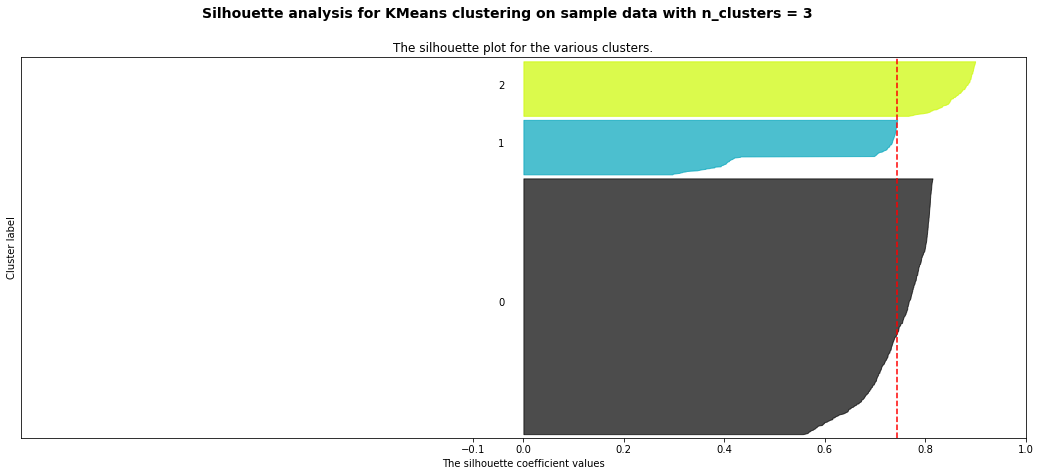

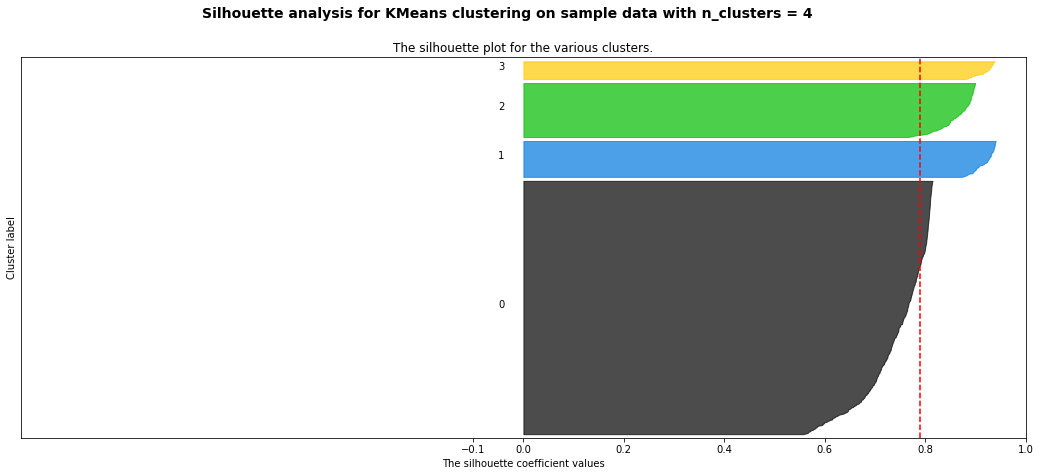

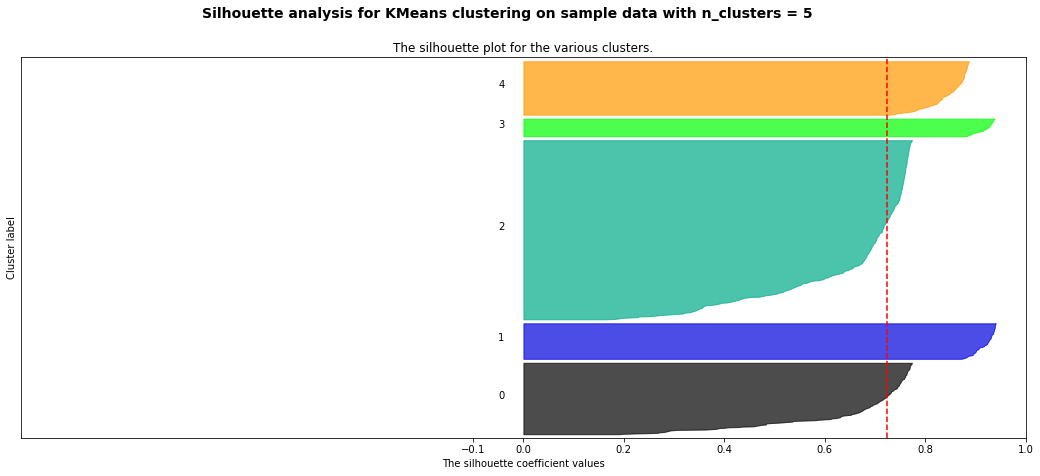

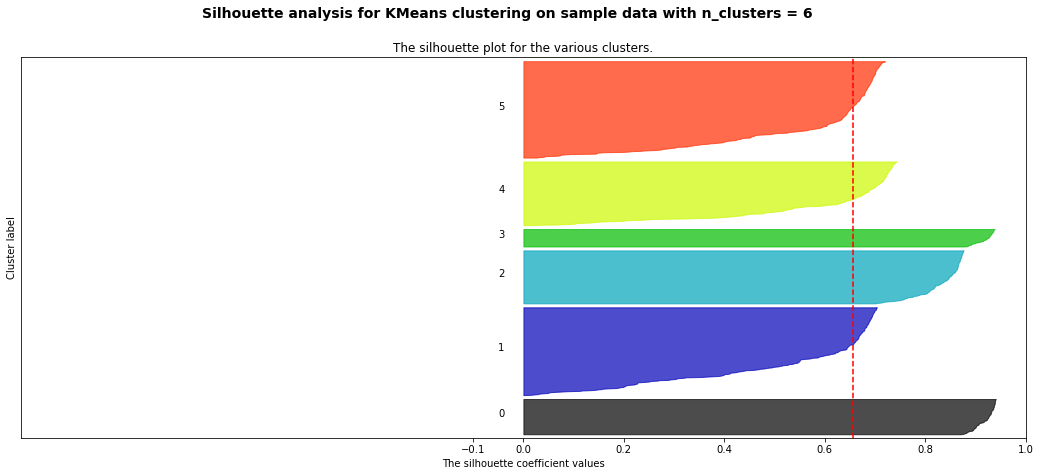

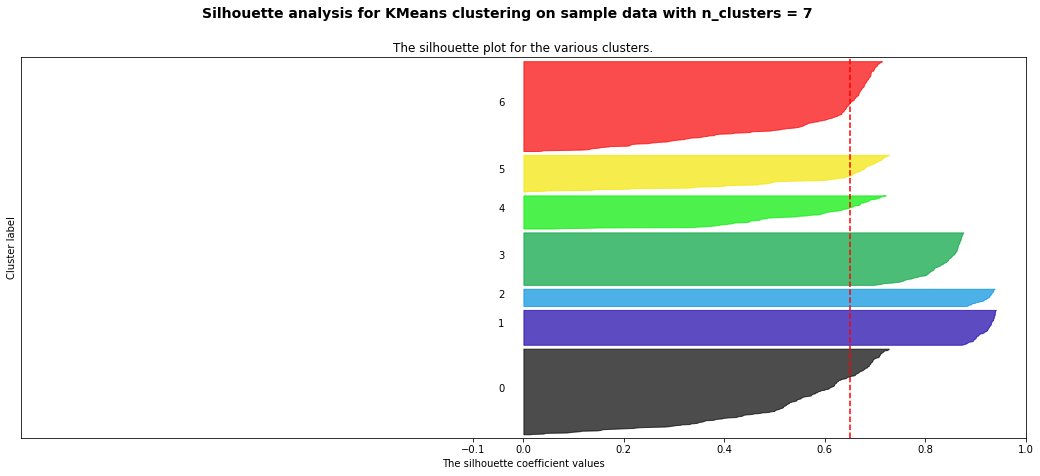

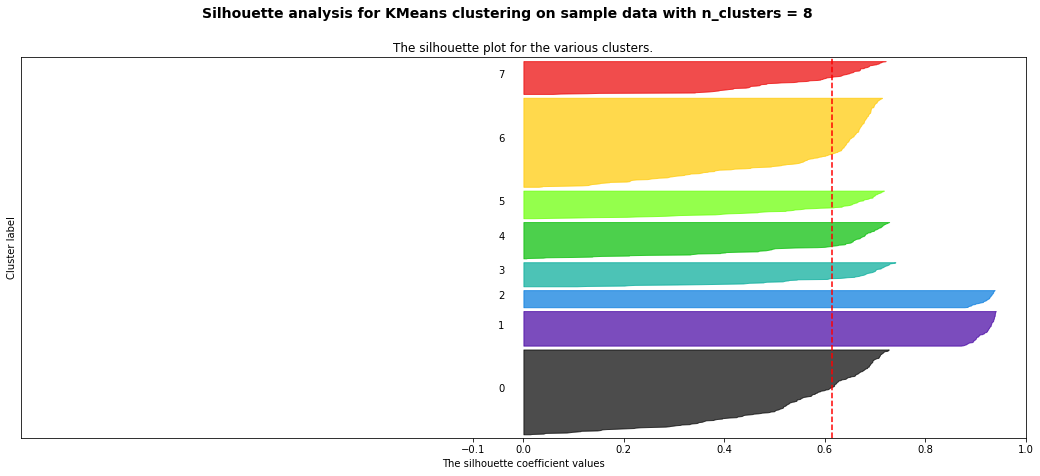

In [5]:
# Your answer here.
X= data
range_n_clusters = [3, 4, 5, 6, 7, 8]

for n_clusters in range_n_clusters:
    # Create a plot - we are just plotting the silhouette plots not the actual clusters yet
    fig, axs = plt.subplots(1, 1)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    axs.set_xlim([-1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    axs.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        axs.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        axs.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    axs.set_title("The silhouette plot for the various clusters.")
    axs.set_xlabel("The silhouette coefficient values")
    axs.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    axs.axvline(x=silhouette_avg, color="red", linestyle="--")

    axs.set_yticks([])  # Clear the yaxis labels / ticks
    axs.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

#     # 2nd Plot showing the actual clusters formed
#     colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
#     ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
#                 c=colors, edgecolor='k')

#     # Labeling the clusters
#     centers = clusterer.cluster_centers_
#     # Draw white circles at cluster centers
#     ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
#                 c="white", alpha=1, s=200, edgecolor='k')

#     for i, c in enumerate(centers):
#         ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
#                     s=50, edgecolor='k')

#     ax2.set_title("The visualization of the clustered data.")
#     ax2.set_xlabel("Feature space for the 1st feature")
#     ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

**Written answer:** The opimal number of clusters found using the silhouette method appears to be 6, but isn't obvious and perhaps other numbers of clusters, such as 4 or 5, would work well also.

## Task 3: Plotting the clusters [20 pts]

Now we will visualize what we just did. For this we will use a common trick in clustering: use a PCA transform to reduce the data to a few variables (two or three) and plot those. Apply a PCA transform to the data using two components and create a scatterplot, differentiating by using colours the clusters from previous answer using a different colour. **Note the clusters still must be calculated over the unrotated data**. Use only your results from using 3, 4 and 5 clusters. **Written answer: How many clusters would you use considering the results of task 2 and these ones?**

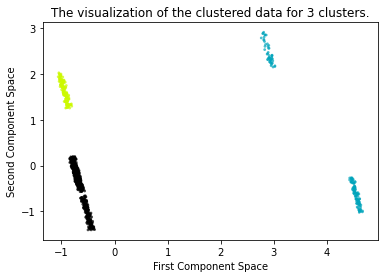

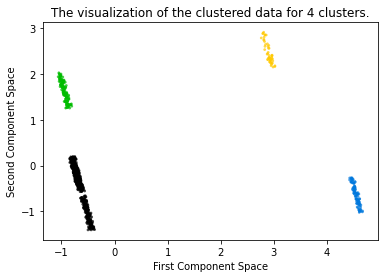

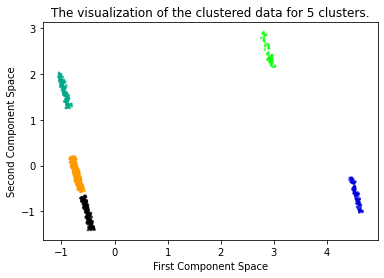

In [6]:
# Your code here. Add as many cells as you need!

range_n_clusters = [3, 4, 5]
for n_clusters in range_n_clusters:
    fig, axs=plt.subplots(1,1)
    km=KMeans(n_clusters)
    pca=PCA(n_components=2)
    data_pca=pca.fit_transform(X)
    labels=km.fit_predict(X)
    colors = cm.nipy_spectral(labels.astype(float) / n_clusters)
    plt.scatter(data_pca[:,0],data_pca[:,1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')
    plt.xlabel("First Component Space")
    plt.ylabel("Second Component Space")
    plt.title("The visualization of the clustered data for "+ str(n_clusters)+" clusters.")

**Written answer** After plotting the clusters, it appears that 5 clusters would be the optimal number of clusters. There appear to be four very distinctive groups, with one group having 2 possible clusters within the larger cluster. You could argue this is one cluster but to me it appears to work better as two distinct clusters instead of one.

## Task 4: Deploying the model. [20 pts]

The objective of any cluster analysis over customer data is to create a reasonable segmentation of your customers. Using the number of clusters you have decided in Task 3 and a table of the averages per variable for each cluster, name the different clusters and think what would a company would do with a customer in that cluster. (*Hint: For example a clusters with high frequency, low recency, and low monetary value are desirable customers for whom it would be a good plan to try to increase their monetary value while keeping their high engagement. You could name them "Diamonds in the rough". [Pandas' `groupby`](https://stackoverflow.com/questions/30328646/python-pandas-group-by-in-group-by-and-average) can probably help.*)

In [7]:
# Your code here.
df=pd.read_csv('RFM_Assignment_Week11.csv')
km=KMeans(n_clusters=5,random_state=10)
km.fit(df)
cluster_labels=km.labels_
data_labelled=df.assign(Cluster=cluster_labels)
print(data_labelled.groupby(['Cluster']).agg({'Recency':'mean','Frequency':'mean',
                                       'MV':'mean','CoS':'mean'}))
                                      



           Recency  Frequency            MV           CoS
Cluster                                                  
0        58.743535  50.159107    876.930495   1090.134542
1        30.017272   5.059000  10494.803018  10000.188643
2        59.809092   0.868768   8007.350500  11001.099604
3        14.911803  10.008273  10996.540746   9999.457148
4         2.167553  99.947029   1153.133946   1005.710736


**Written answer: (note this answer will be much longer than usual as you need to make an argument for every cluster)**
Label 0 has a high recency, high frequency, but a low monetary value and low cost of service. This shows that these customers frequently will interact with the business, but don't spend as much, or are just looking. We can call this cluster the "small spenders". Steps to reduce time spent with these customers can furthur decrease the CoS of this group, or upselling could increase the MV of this group. Cluster 2 has a moderate recency and low frequency, but a very high monetary value and high cost of service, indicating they interact with the business fairly infrequently but when they do, they are spending significant money. I would call this group the "infrequent high-rollers". Steps to bring these customers into the store more frequently should be used. Cluster 2 has a high recency, but very low frequency and moderate MV and high CoS, likely because they stop by so infrequently. This group could be called the "rare and lost customers", who don't come by the store anymoreor would rather go elsewhere so rarely come to your business. Methods to incentivize their business, and steps should be taken to ensure positive interactions with these customers as they spend when they do interact with the business. Cluster 3 has a fairly low recency and low frequency, but very high monetary value and high CoS. I would say this cluster is a group that doesn't come often, but spends when they do. You could call this group the "big but infrequent spenders". Cluster 4 has a very low recency but extremely high frequency, a low MV and low CoS. This group i would call "browsers", as they come by often just to look but barely spend anything. Steps to reduce time spent with these customers should be taken.

## Task 5: Hierarchical clustering comparison [20 pts]

Now repeat the clustering process using a complete linkage hierarchical clustering with cosine affinity, using the same number of clusters as Task 4. Using the PCA transform you calculated in Task 3, create a scatterplot differentiating the obtained clusters using different colours. **Written answer: What can you say about the new clustering you obtained? Why does this happen? When would you say it is a good idea to use this configuration?** 

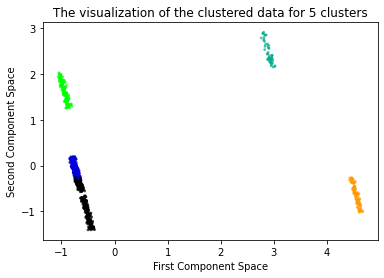

In [8]:
# Your code here
clustering = AgglomerativeClustering(n_clusters=5, affinity='cosine',linkage='complete')
labels=clustering.fit_predict(X)
X_pca=pca.fit_transform(X)

fig, axs=plt.subplots(1,1)
colors = cm.nipy_spectral(labels.astype(float) / 5)
plt.scatter(X_pca[:, 0], X_pca[:, 1], marker='.', s=30, lw=0, alpha=0.7,
            c=colors, edgecolor='k')
plt.xlabel("First Component Space")
plt.ylabel("Second Component Space")
plt.title("The visualization of the clustered data for 5 clusters")
plt.show()




**Written answer:** I can say that the cluster at the bottom left corner (near -1,-1) appears to be clustered somewhat different than using k-means clustering. The clustering in k-means appeared to work better than in hierarchical for this particular dataset, possibly because the data are well clumped together. The data isn't completely linked either, possibly causing hierarchical clustering to group some of the data together with one cluster that appears to fit better with another cluster. I think this method would work better if there wasn't such a distinctive break between one cluster and another. Hierarchical clustering would then be able to more accurately determine where the clusters should actually be.